In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from relation_extractor import RelationExtractor
from knowledge_graph_generator import KnowledgeGraphGenerator

In [2]:
# RelationExtractor example.  It isn't perfect but its a good start.
extractor = RelationExtractor("Gone with the Wind", "This movie was horrible.  It was old and had a lot of racism and it was shot in Georgia.")
for i in extractor.relations:
    print(i)

('Gone with the Wind', 'features the location', 'Georgia')
('Gone with the Wind', 'features the theme', 'a lot of racism')
('Gone with the Wind', 'features the theme', 'racism')
('Gone with the Wind', 'is', 'horrible')
('Gone with the Wind', 'is', 'old')


In [3]:
# KnowledgeGraphGenerator example for the best movie of all time, Top Gun. 
# This method has a massive time complexity that could definitely be improved.
full_review_df = pd.read_csv("data/review_df.csv")
review_df = full_review_df.loc[full_review_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
full_known_df = pd.read_csv("data/known_df.csv")
known_df = full_known_df.loc[full_known_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
generator = KnowledgeGraphGenerator(
    input_data_list=[review_df],
    known_data_list=[known_df]
)
kg_df = generator.knowledge_graph_df \
    .drop_duplicates() \
    .reset_index(drop = True)

In [4]:
for i in range(len(kg_df)):
    row = kg_df.iloc[i]
    print(row["entity_id"], row["relation"], row["value"])

m/top_gun features the miscellaneous theme Top Gun
m/top_gun features the theme top gun
m/top_gun features the theme the type of movie turns the screen
m/top_gun features the theme the screen
m/top_gun features the theme an altar
m/top_gun features the theme its slick façade of 1980s magnificence
m/top_gun features the theme the shadow of a film
m/top_gun features the theme a film defined the modern day action blockbuster
m/top_gun features the theme the modern day action blockbuster
m/top_gun is slick
m/top_gun is modern
m/top_gun features the person Clint Eastwood
m/top_gun features the miscellaneous theme Firefox
m/top_gun features the theme the dogfights
m/top_gun features the theme the scenes the people talk
m/top_gun features the theme the people
m/top_gun is best
m/top_gun is aerial
m/top_gun features the person Tom Cruise
m/top_gun features the theme the cockpit windshield
m/top_gun is smug
m/top_gun is arrogant
m/top_gun features the theme focuses on the machismo posturing
m/t

In [10]:
kg = nx.DiGraph()
kg.add_node(kg_df["entity_id"].unique()[0])
for i in range(len(kg_df)):
    kg.add_node(
        kg_df.iloc[i]["value"],
        value=kg_df.iloc[i]["value"])
    kg.add_edge(
        kg_df["entity_id"].unique()[0],
        kg_df.iloc[i]["value"],
        relation=kg_df.iloc[i]["relation"]
    )

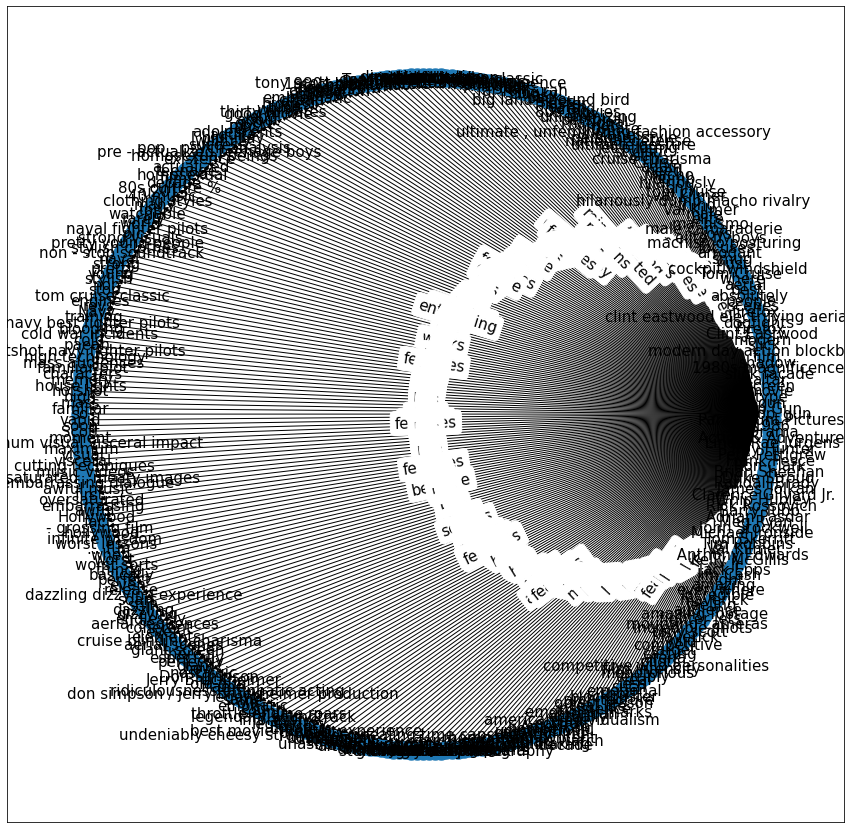

In [11]:
plt.figure(figsize=(15,15))
pos = nx.circular_layout(kg)
nx.draw_networkx(kg, pos=pos, font_size=15)
edge_labels = nx.get_edge_attributes(kg, 'relation')
nx.draw_networkx_edge_labels(kg, pos, edge_labels=edge_labels, font_size=15)
plt.show()